# UMUX

In [10]:
import pandas as pd

# Define the relative path to the CSV file
file_path = "../../../cleaned_data/questionnaire_df.csv"

questionnaire_df = pd.read_csv(file_path)

# Filter columns that contain "PERSONAL" or "SEQ" in their names
filtered_columns = [col for col in questionnaire_df.columns if "Controller" in col or "UMUX" in col or "participant_code" in col]

# Create a new dataframe with the filtered columns
filtered_df = questionnaire_df[filtered_columns]

# Display the new dataframe
filtered_df.head()

,PERSONAL_Controller being tested?,PERSONAL_participant_code,RW-WITH-VR_UMUX1: The teleoperation system capabilities meet my requirements/expectations,RW-WITH-VR_UMUX2: Using this teleoperation system is a frustrating experience,RW-WITH-VR_UMUX3: This teleoperation system is easy to use,RW-WITH-VR_UMUX4: I have to spend to much time correcting/compensating things with this teleoperation system,RW-NO-VR_UMUX1: The teleoperation system capabilities meet my requirements/expectations.1,RW-NO-VR_UMUX2: Using this teleoperation system is a frustrating experience.1,RW-NO-VR_UMUX3: This teleoperation system is easy to use.1,RW-NO-VR_UMUX4: I have to spend to much time correcting/compensating things with this teleoperation system.1
0,Chiron,HASJ22,4.0,3.0,5.0,6.0,5.0,2,6,4
1,Chiron,AAHF21,3.0,5.0,2.0,4.0,4.0,2,3,4
2,Chiron,DOCS21,6.0,1.0,6.0,5.0,7.0,1,6,4
3,Chiron,ATSF08,5.0,2.0,5.0,3.0,5.0,2,5,4
4,Chiron,CEEJ05,4.0,3.0,2.0,6.0,5.0,1,3,6


In [11]:
import pandas as pd

# Extract relevant columns
selected_columns = filtered_df.iloc[:, :10]  # Assuming the first 9 columns are relevant

# Rename columns as per the specified format
selected_columns.columns = [
    "Controller",
    "ID",
    "RW-WITH-VR-1",
    "RW-WITH-VR-2",
    "RW-WITH-VR-3",
    "RW-WITH-VR-4",
    "RW-NO-VR-1",
    "RW-NO-VR-2",
    "RW-NO-VR-3",
    "RW-NO-VR-4"
]

selected_columns["Controller"] = selected_columns["Controller"].replace("Chiron", "SBC")
selected_columns.to_csv("umux.csv", index=False)
selected_columns

,Controller,ID,RW-WITH-VR-1,RW-WITH-VR-2,RW-WITH-VR-3,RW-WITH-VR-4,RW-NO-VR-1,RW-NO-VR-2,RW-NO-VR-3,RW-NO-VR-4
0,SBC,HASJ22,4.0,3.0,5.0,6.0,5.0,2,6,4
1,SBC,AAHF21,3.0,5.0,2.0,4.0,4.0,2,3,4
2,SBC,DOCS21,6.0,1.0,6.0,5.0,7.0,1,6,4
3,SBC,ATSF08,5.0,2.0,5.0,3.0,5.0,2,5,4
4,SBC,CEEJ05,4.0,3.0,2.0,6.0,5.0,1,3,6
5,SBC,NULS22,3.0,2.0,4.0,7.0,3.0,2,4,7
6,SBC,DAMA12,5.0,1.0,6.0,5.0,6.0,1,7,2
7,SBC,XHKB15,4.0,4.0,3.0,6.0,5.0,2,5,5
8,SBC,RENL05,7.0,5.0,3.0,4.0,3.0,3,5,4
9,WBC,ARAH22,6.0,4.0,6.0,4.0,5.0,4,5,2


In [3]:
umux_df = selected_columns
# Group by 'Controller' and compute the mean for each column
controller_means = umux_df.groupby('Controller').transform(lambda x: x.fillna(x.mean()))

# Fill missing values in the original dataframe
umux_df.update(controller_means)

In [4]:
umux_df

,Controller,RW-WITH-VR-1,RW-WITH-VR-2,RW-WITH-VR-3,RW-WITH-VR-4,RW-NO-VR-1,RW-NO-VR-2,RW-NO-VR-3,RW-NO-VR-4
0,SBC,4.000,3.0,5.0,6.0,5.000000,2,6,4
1,SBC,3.000,5.0,2.0,4.0,4.000000,2,3,4
2,SBC,6.000,1.0,6.0,5.0,7.000000,1,6,4
3,SBC,5.000,2.0,5.0,3.0,5.000000,2,5,4
4,SBC,4.000,3.0,2.0,6.0,5.000000,1,3,6
5,SBC,3.000,2.0,4.0,7.0,3.000000,2,4,7
6,SBC,5.000,1.0,6.0,5.0,6.000000,1,7,2
7,SBC,4.000,4.0,3.0,6.0,5.000000,2,5,5
8,SBC,7.000,5.0,3.0,4.0,3.000000,3,5,4
9,WBC,6.000,4.0,6.0,4.0,5.000000,4,5,2


In [12]:
umux_df=selected_columns

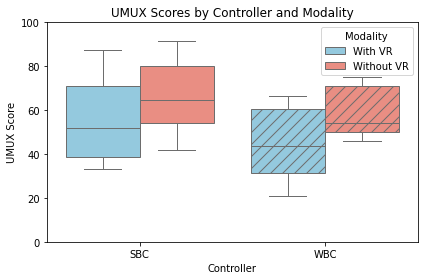

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate UMUX score
def calculate_umux_score(row, prefix):
    item1 = row[f'{prefix}-1']
    item2 = row[f'{prefix}-2']
    item3 = row[f'{prefix}-3']
    item4 = row[f'{prefix}-4']
    
    # Calculate individual item scores
    score1 = item1 - 1
    score2 = 7 - item2
    score3 = item3 - 1
    score4 = 7 - item4
    
    # Total score
    total_score = score1 + score2 + score3 + score4
    
    # Normalize to 0-100 scale
    umux_score = (total_score / 24) * 100
    return umux_score

# Load dataset (assuming 'umux_df' is already loaded)
# umux_df = pd.read_csv("your_data_file.csv")  # Uncomment if loading from file

# Calculate UMUX scores for each condition
umux_df['UMUX_With_VR'] = umux_df.apply(calculate_umux_score, prefix='RW-WITH-VR', axis=1)
umux_df['UMUX_No_VR'] = umux_df.apply(calculate_umux_score, prefix='RW-NO-VR', axis=1)

# Reshape the data for visualization
umux_df_melted = umux_df.melt(id_vars=['Controller'], value_vars=['UMUX_With_VR', 'UMUX_No_VR'], 
                               var_name='VR Condition', value_name='UMUX Score')

# Rename conditions for clarity
umux_df_melted['VR Condition'] = umux_df_melted['VR Condition'].replace({'UMUX_With_VR': 'With VR', 'UMUX_No_VR': 'Without VR'})

# Set up the figure
plt.figure(figsize=(6, 4))

# Create the boxplot with different colors for VR conditions
ax = sns.boxplot(
    x="Controller", 
    y="UMUX Score", 
    hue="VR Condition", 
    data=umux_df_melted, 
    palette={"With VR": "skyblue", "Without VR": "salmon"}
)

# Apply hatching for WBC (Corrected and Simplified)
for i, patch in enumerate(ax.patches):
    if i == 1:
        patch.set_hatch("//")
    if i == 3:
        patch.set_hatch("//")
        
# Customize the plot
plt.title("UMUX Scores by Controller and Modality")
plt.xlabel("Controller")
plt.ylabel("UMUX Score")
plt.ylim(0, 100)  # Set y-axis range from 0 to 100
plt.legend(title="Modality")

plt.tight_layout()
output_path = "UMEX_boxplot.pdf"  # Specify your desired file path
plt.savefig(output_path, format='pdf')
# Show plot
plt.show()


In [15]:
umux_df.to_csv('umux.csv',index=False)

In [14]:
umux_df.describe()

,RW-WITH-VR-1,RW-WITH-VR-2,RW-WITH-VR-3,RW-WITH-VR-4,RW-NO-VR-1,RW-NO-VR-2,RW-NO-VR-3,RW-NO-VR-4,UMUX_With_VR,UMUX_No_VR
count,18.000000,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000,18.000000,19.000000
mean,4.611111,3.500000,4.100000,5.050000,4.789474,2.200000,4.700000,4.000000,50.925926,63.377193
std,1.539247,1.670172,1.518309,1.234376,1.182227,1.105013,1.380313,1.337712,18.827756,14.931618
min,2.000000,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,2.000000,20.833333,41.666667
25%,4.000000,2.000000,3.000000,4.000000,4.000000,1.750000,3.000000,3.750000,37.500000,54.166667
50%,4.500000,3.000000,4.000000,5.000000,5.000000,2.000000,5.000000,4.000000,47.916667,62.500000
75%,6.000000,5.000000,5.250000,6.000000,5.500000,2.250000,6.000000,5.000000,66.666667,70.833333
max,7.000000,6.000000,7.000000,7.000000,7.000000,5.000000,7.000000,7.000000,87.500000,91.666667
